# Application 2.13. Calculating the DTFT of a pulse via the DFT

In [3]:
import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt

In [4]:
N = 20  # DFT size
N1 = 5  # num. non-zero samples in the (aperiodic) pulse
x = np.concatenate((np.ones(N1), np.zeros(N - N1)))  # signal x[n]
N2 = 512  # num. samples of the DTFT theoretical expression
k = np.arange(N2)  # Indices of freq. components
wk = k * 2 * np.pi / N2  # Angular frequencies
Xk_fft = fft(x)  # Use N-point DFT to sample DTFT
Xk_theory = (np.sin(wk * N1 / 2) / np.sin(wk / 2)) * np.exp(-1j * wk * (N1 - 1) / 2)
Xk_theory[0] = N1  # Take care of 0/0 (NaN) at k=0

/tmp/ipykernel_31341/1933957444.py:8: RuntimeWarning: invalid value encountered in divide
  Xk_theory = (np.sin(wk * N1 / 2) / np.sin(wk / 2)) * np.exp(-1j * wk * (N1 - 1) / 2)


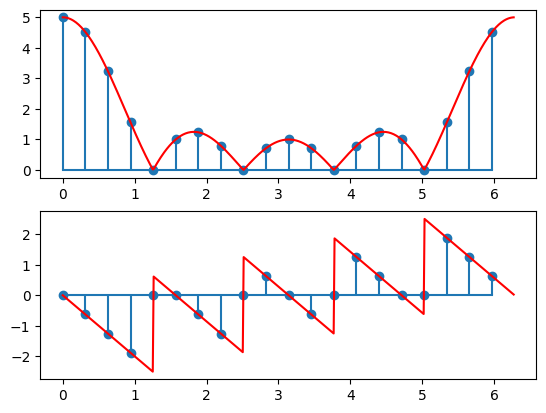

In [5]:
plt.subplot(211)
plt.stem(2 * np.pi * np.arange(N) / N, abs(Xk_fft), basefmt="")
plt.plot(wk, abs(Xk_theory), "r")
plt.subplot(212)
plt.stem(2 * np.pi * np.arange(N) / N, np.angle(Xk_fft), basefmt="")
plt.plot(wk, np.angle(Xk_theory), "r")
plt.show()